In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import backend

# n-variate colormaps
This notebook generates colormaps that form 

The colormaps are generated from the ‘CAM02-LCD’ colorspace as defined in the package colorspacious (https://pypi.org/project/colorspacious/)

https://github.com/trygvrad/colorstamps/ is used for easy access to this colorspace and visualization

In practice, we are looking for vectors that evenly dissects the available colorspace

In [2]:
N2 = 37
N = 19
colorbar_even_dict = {}
versions = ['A', 'B']#, 'C', 'D']
radius = 37 # max saturation

# ADD

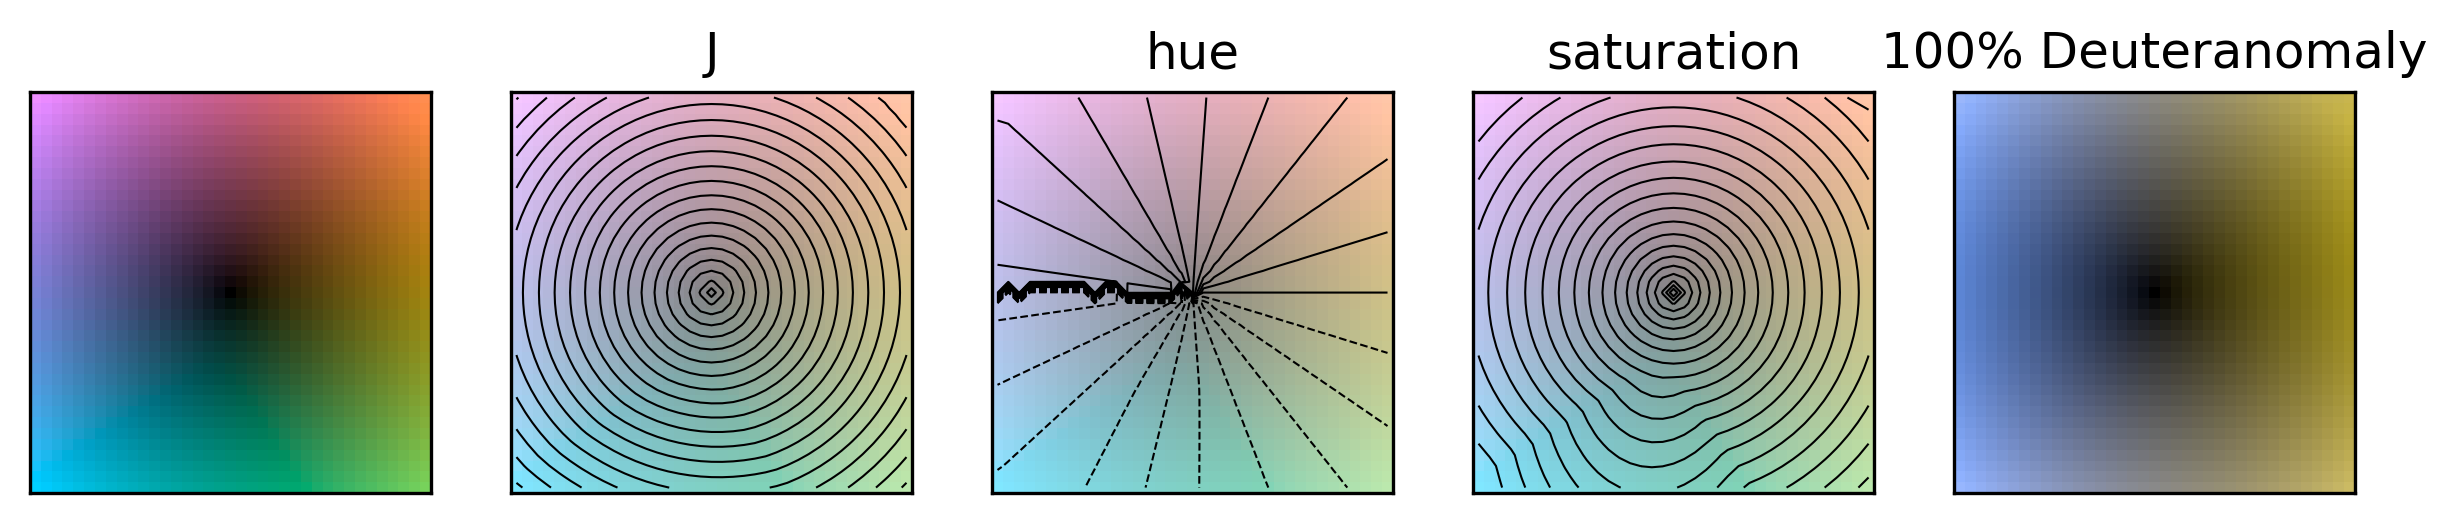

In [3]:

cmap = backend.get_var_J(l = N2, J = (77,2), gamma = 0.8, sat_gamma = 0.6)
fig, axes = plt.subplots(1,5, figsize = (10,3), dpi = 300, facecolor = 'w')
backend.eval(cmap, axes)

In [4]:
for n in range(4, 15, 2):
    for version, rot, max_J in zip(versions, [45/n, -180/n + 45/n], [77, 77]): # [90/n, -90/n]
        name = f'{n}VarAdd{version}'
        J = (max_J, 2) # range in lightness 
        gamma = 0.8
        sat_gamma = 0.6
        
        cmaps = [backend.get_var_J(l = N2, J = J, rot = rot + i/n*360.0, r = radius, gamma = gamma, sat_gamma = sat_gamma)[N,:N][::-1] for i in range(n)] 
        cmaps = np.array(cmaps)
        
        # adjust greyscale by slightly shifting colorbars
        n2 = n//2
        for i in range(N):
            for j in range(n2):
                factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
                average_RGB = np.average([cmaps[j][i], cmaps[j+n2][i]])
                for k in range(3):
                    d = average_RGB - np.average([cmaps[j][i, k],cmaps[j+n2][i, k]]) # adjustment to that color to make mix grey 
                    for c in cmaps[j], cmaps[j+n2]:
                        c[i,k] += factor*d
        
        # ensure origin is rgb = (0,0,0)
        # non-linear mixing so that darker colors become more distinct
        ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
        for i, cm in enumerate(cmaps):
            cmap_b = cmaps[i] - cmaps[i][0,:] # copy with black 0,0,0
            cmaps[i] = cmap_b * (1-ls) + cmaps[i] * (ls)
        
        cmaps[cmaps>1] = 1
        cmaps[cmaps<0] = 0
        
        for i, c in enumerate(cmaps):
            colorbar_even_dict[name+str(i)] = np.copy(c)
            

# SUB

In [5]:

for n in range(4, 15, 2):
    for version, r, min_J in zip(versions, [45/n, -180/n + 45/n], [77.6, 77.6]):
        name = f'{n}VarSub{version}'
        J = (min_J, 128) # range in lightness 
        
        cmaps = [backend.get_var_J(l = N2, J = J, rot = r + i/n*360.0, r = radius)[N,:N][::-1] for i in range(n)] 
        cmaps = np.array(cmaps)
        
            
        # adjust greyscale by slightly shifting colorbars
        n2 = n//2
        for i in range(N):
            for j in range(n2):
                factor = 1#i/N-1 #scale the correction with distance from origin, no need to adjust low values
                average_RGB = np.average([cmaps[j][i], cmaps[j+n2][i]])
                for k in range(3):
                    d = average_RGB - np.average([cmaps[j][i, k],cmaps[j+n2][i, k]]) # adjustment to that color to make mix grey 
                    for c in cmaps[j], cmaps[j+n2]:
                        c[i,k] += factor*d
        
        # ensure origin is rgb = (1,1,1)
        # non-linear mixing so that darker colors become more distinct
        ls = np.linspace(0,1,N)[:, np.newaxis]**0.3*np.ones((N,3))
        for i, cm in enumerate(cmaps):
            cmap_b = cmaps[i] + (1 - cmaps[i][0,:]) # copy with black 0,0,0
            cmaps[i] = cmap_b * (1-ls) + cmaps[i] * (ls)
            
        cmaps[cmaps>1] = 1
        cmaps[cmaps<0] = 0
        
        for i, c in enumerate(cmaps):
            colorbar_even_dict[name+str(i)] = np.copy(c)

In [6]:
colorbar_even_dict.keys()

dict_keys(['4VarAddA0', '4VarAddA1', '4VarAddA2', '4VarAddA3', '4VarAddB0', '4VarAddB1', '4VarAddB2', '4VarAddB3', '6VarAddA0', '6VarAddA1', '6VarAddA2', '6VarAddA3', '6VarAddA4', '6VarAddA5', '6VarAddB0', '6VarAddB1', '6VarAddB2', '6VarAddB3', '6VarAddB4', '6VarAddB5', '8VarAddA0', '8VarAddA1', '8VarAddA2', '8VarAddA3', '8VarAddA4', '8VarAddA5', '8VarAddA6', '8VarAddA7', '8VarAddB0', '8VarAddB1', '8VarAddB2', '8VarAddB3', '8VarAddB4', '8VarAddB5', '8VarAddB6', '8VarAddB7', '10VarAddA0', '10VarAddA1', '10VarAddA2', '10VarAddA3', '10VarAddA4', '10VarAddA5', '10VarAddA6', '10VarAddA7', '10VarAddA8', '10VarAddA9', '10VarAddB0', '10VarAddB1', '10VarAddB2', '10VarAddB3', '10VarAddB4', '10VarAddB5', '10VarAddB6', '10VarAddB7', '10VarAddB8', '10VarAddB9', '12VarAddA0', '12VarAddA1', '12VarAddA2', '12VarAddA3', '12VarAddA4', '12VarAddA5', '12VarAddA6', '12VarAddA7', '12VarAddA8', '12VarAddA9', '12VarAddA10', '12VarAddA11', '12VarAddB0', '12VarAddB1', '12VarAddB2', '12VarAddB3', '12VarAddB4', '

In [7]:
colorbar_dict = {}
# transfer even
for n in range(4, 9, 2):
    if n == 4:
        v = versions
    else:
        v = ['A']
    for version in v:
        for i in range(n):
            for typ in ['Add', 'Sub']:
                name = f'{n}Var{typ}{version}{i}'
                colorbar_dict[name]  = colorbar_even_dict[name]
            #print(name)
# transfer odd
for n in range(5, 8, 2):
    v = ['A']
    for version in v:
        for i in range(n):
            for typ in ['Add', 'Sub']:
                name = f'{2*n}Var{typ}{version}{i*2+1}'
                new_name = f'{n}Var{typ}{version}{i}'
                colorbar_dict[new_name]  = colorbar_even_dict[name]
            #print(new_name)
print(colorbar_dict.keys())

dict_keys(['4VarAddA0', '4VarSubA0', '4VarAddA1', '4VarSubA1', '4VarAddA2', '4VarSubA2', '4VarAddA3', '4VarSubA3', '4VarAddB0', '4VarSubB0', '4VarAddB1', '4VarSubB1', '4VarAddB2', '4VarSubB2', '4VarAddB3', '4VarSubB3', '6VarAddA0', '6VarSubA0', '6VarAddA1', '6VarSubA1', '6VarAddA2', '6VarSubA2', '6VarAddA3', '6VarSubA3', '6VarAddA4', '6VarSubA4', '6VarAddA5', '6VarSubA5', '8VarAddA0', '8VarSubA0', '8VarAddA1', '8VarSubA1', '8VarAddA2', '8VarSubA2', '8VarAddA3', '8VarSubA3', '8VarAddA4', '8VarSubA4', '8VarAddA5', '8VarSubA5', '8VarAddA6', '8VarSubA6', '8VarAddA7', '8VarSubA7', '5VarAddA0', '5VarSubA0', '5VarAddA1', '5VarSubA1', '5VarAddA2', '5VarSubA2', '5VarAddA3', '5VarSubA3', '5VarAddA4', '5VarSubA4', '7VarAddA0', '7VarSubA0', '7VarAddA1', '7VarSubA1', '7VarAddA2', '7VarSubA2', '7VarAddA3', '7VarSubA3', '7VarAddA4', '7VarSubA4', '7VarAddA5', '7VarSubA5', '7VarAddA6', '7VarSubA6'])


# Save

In [8]:
import pickle
with open(r"n_multivariate_cmaps.pickle", "wb") as output_file:
    pickle.dump(colorbar_dict, output_file)